<a href="https://colab.research.google.com/github/Joizra/Python-Random-Forest-Hybrid-Feature-Selection-Method-and-Random-Forest-for-Predicting-Crop-Yield/blob/main/Local1__Project_phase_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
!pip install joblib
import joblib
!pip install mlxtend

In [ ]:
!pip install py7zr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 30.7 MB/s eta 0:00:00


In [ ]:
import py7zr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pyarrow

# Load Dataset

In [ ]:
# Specify the path to the 7-Zip archive file
archive_path2= '/content/drive/My Drive/Colab Notebooks/Project/mds_data.feather'
df = pd.read_feather(archive_path2)

In [ ]:
location = ['emerald']
df = df[df['name'].isin(location)].reset_index(drop=True)

# Data cleaning

A zero variance feature in a dataset is a variable that has the same value for every observation. Such a feature does not contribute any information that can be used for analysis or predictive modeling because it does not vary between observations, essentially providing no insight or discriminative power

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210560 entries, 0 to 210559
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 210560 non-null  object  
 1   longitude            210560 non-null  float64 
 2   latitude             210560 non-null  float64 
 3   simDoc               210560 non-null  object  
 4   soilCapacity         210560 non-null  category
 5   initialSW            210560 non-null  category
 6   NFert                210560 non-null  category
 7   sowDate              210560 non-null  category
 8   cultivar             210560 non-null  category
 9   pldensity            210560 non-null  category
 10  SSC_start            210560 non-null  float64 
 11  SSC_slowstart        210560 non-null  float64 
 12  year                 210560 non-null  int32   
 13  yield                210560 non-null  float64 
 14  pawc                 210560 non-null  float64 
 15  

In [ ]:
print(f'Dataset has {len(df.index)} records')
print(f'with column names of {list(df.columns)}')

Dataset has 210560 records
with column names of ['name', 'longitude', 'latitude', 'simDoc', 'soilCapacity', 'initialSW', 'NFert', 'sowDate', 'cultivar', 'pldensity', 'SSC_start', 'SSC_slowstart', 'year', 'yield', 'pawc', 'EpSum', 'EpBeforeFlowering', 'EpAroundFlowering', 'EpAfterFlowering', 'EsSum', 'EsBeforeFlowering', 'EsAroundFlowering', 'EsAfterFlowering', 'RadnSum', 'RadnBeforeFlowering', 'RadnAroundFlowering', 'RadnAfterFlowering', 'RainSum', 'RainBeforeFlowering', 'RainAroundFlowering', 'RainAfterFlowering', 'PTQSum', 'RunOffSum', 'MaxTAVG', 'MinTAVG', 'MeanTAVG', 'CGRAroundFlowering']


### Drop all zero-variance features

In [ ]:
soil=df.copy()

In [ ]:
soil.drop(columns=['simDoc','cultivar','pldensity', 'SSC_slowstart'], inplace=True)
soil.head()

,name,longitude,latitude,soilCapacity,initialSW,NFert,sowDate,SSC_start,year,yield,...,RainSum,RainBeforeFlowering,RainAroundFlowering,RainAfterFlowering,PTQSum,RunOffSum,MaxTAVG,MinTAVG,MeanTAVG,CGRAroundFlowering
0,emerald,148.165108,-23.511288,base,25top,0,15-apr,500.0,1910,1260.130,...,94.9,33.7,48.5,12.7,0.912,0.000,25.181,9.978,17.580,155.524
1,emerald,148.165108,-23.511288,base,25top,0,15-apr,500.0,1911,483.800,...,36.4,21.1,0.0,15.3,1.070,0.000,24.963,6.979,15.971,27.071
2,emerald,148.165108,-23.511288,base,25top,0,15-apr,500.0,1912,1216.562,...,422.7,270.6,152.1,0.0,0.937,90.279,24.904,9.834,17.369,139.898
3,emerald,148.165108,-23.511288,base,25top,0,15-apr,500.0,1913,1045.829,...,243.8,219.8,20.5,3.5,1.001,23.366,23.940,8.495,16.218,163.028
4,emerald,148.165108,-23.511288,base,25top,0,15-apr,500.0,1914,1291.633,...,159.5,39.0,111.8,8.7,0.909,21.629,25.146,9.936,17.541,147.106


Locate the target to the front of the table

In [ ]:
# Move column at position n to position 0
n = 0  # specify the index of the column to be moved, in this case, column 'D'
cols = list(soil.columns)
cols = [cols[9]] + [col for col in cols if col != cols[9]]

# Reindex DataFrame with the reordered columns
soil = soil[cols]

In [ ]:
#32 features+1target
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210560 entries, 0 to 210559
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   yield                210560 non-null  float64 
 1   name                 210560 non-null  object  
 2   longitude            210560 non-null  float64 
 3   latitude             210560 non-null  float64 
 4   soilCapacity         210560 non-null  category
 5   initialSW            210560 non-null  category
 6   NFert                210560 non-null  category
 7   sowDate              210560 non-null  category
 8   SSC_start            210560 non-null  float64 
 9   year                 210560 non-null  int32   
 10  pawc                 210560 non-null  float64 
 11  EpSum                210560 non-null  float64 
 12  EpBeforeFlowering    210560 non-null  float64 
 13  EpAroundFlowering    210560 non-null  float64 
 14  EpAfterFlowering     210560 non-null  float64 
 15  

# Data Preprocessing

In [ ]:
X=soil.drop(['yield'],axis=1)
y=soil['yield']

In [ ]:
X.columns

Index(['name', 'longitude', 'latitude', 'soilCapacity', 'initialSW', 'NFert',
       'sowDate', 'SSC_start', 'year', 'pawc', 'EpSum', 'EpBeforeFlowering',
       'EpAroundFlowering', 'EpAfterFlowering', 'EsSum', 'EsBeforeFlowering',
       'EsAroundFlowering', 'EsAfterFlowering', 'RadnSum',
       'RadnBeforeFlowering', 'RadnAroundFlowering', 'RadnAfterFlowering',
       'RainSum', 'RainBeforeFlowering', 'RainAroundFlowering',
       'RainAfterFlowering', 'PTQSum', 'RunOffSum', 'MaxTAVG', 'MinTAVG',
       'MeanTAVG', 'CGRAroundFlowering'],
      dtype='object')

In [ ]:
Column_keep=['EpBeforeFlowering','EpAroundFlowering','EpAfterFlowering', 'CGRAroundFlowering', 'pawc']

X=pd.DataFrame(X[Column_keep].reset_index(drop=True))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Standard Scaler

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

### Imputed

In [ ]:
from sklearn.impute import SimpleImputer

# Creating the imputer object
imputer = SimpleImputer(strategy='median')
# # Fitting the imputer to the data and transforming it
X_imputed = imputer.fit_transform(X_scaled)

# Resulting DataFrame
X_imputed

array([[-1.53307172, -0.17751667, -0.63115505, -0.15427556, -1.16332407],
       [ 0.78309749, -0.50990398,  1.215933  , -0.28480784,  0.00499339],
       [-1.16114813, -0.56618247,  0.41778222, -0.41846084, -0.69599709],
       ...,
       [-1.62592618, -1.14074668, -0.89085438, -1.03736557, -0.69599709],
       [ 1.55766014,  1.54055294,  2.46418192,  1.15995885,  0.47232037],
       [ 1.40431878,  2.70243005,  4.00487515,  3.43955409,  0.39443254]])

In [ ]:
y_train

10055      590.608
60744     2028.325
112198     926.292
200550     456.575
89259      993.996
            ...   
119879    2185.508
103694    1741.547
131932      94.555
146867    2617.438
121958    4605.121
Name: yield, Length: 126336, dtype: float64

In [ ]:
X_train=pd.DataFrame(imputer.fit_transform(X_imputed), columns=Column_keep).reset_index(drop=True)

In [ ]:
y_train=y_train.reset_index(drop=True)

# Feature selected

In [ ]:
# # Add a constant (intercept) to the model
X_train_const = sm.add_constant(X_train)


# Fit the OLS model
model = sm.OLS(y_train, X_train_const).fit()

# Summary of the model to get p-values and t-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 6.613e+05
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:32:25   Log-Likelihood:            -8.2724e+05
No. Observations:              126336   AIC:                         1.654e+06
Df Residuals:                  126330   BIC:                         1.655e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1180.2784      0

In [ ]:
# Define the desired sample size
sample_size = 15000

# Perform random sampling on X_train
sampled_X_train = X_train.sample(n=sample_size, random_state=42)

# Get the indices of the sampled rows
sampled_indices = sampled_X_train.index

# Retrieve corresponding records from y_train using the sampled indices
sampled_y_train = y_train.loc[sampled_indices]



# Modelling

## Random Forest

* Random Forest is a **non-linear** model that consists of a collection of decision trees.
* Random Forest does not require feature scaling (like standardization or normalization) before training. The model is not sensitive to the magnitude of features since it uses rule-based splitting.
* Random Forest **does not assume a linear relationship between features and the target variable**. It can capture non-linear relationships.
* There are no assumptions about the distribution of the features or target variable. Therefore, it can handle skewed and non-normally distributed data quite well.
* Random Forest can handle a skewed target variable without the need for transformation, sometimes transforming the target variable.
*  it is often considered a "black box" model, meaning it is less interpretable than linear models. Feature importance scores from a Random Forest can give some insight into the relative importance of features, but they don't provide information about the nature of the relationships between features and the target.
* Random Forest is also quite robust to outliers in the input features. However, extreme outliers in the target variable can still potentially influence the construction of trees and lead to overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

import numpy as np
import matplotlib.pyplot as plt

# Define a KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=1)


# Parameters grid for Random Forest Regressor
param_grid = {
    'n_estimators': [300],
    'max_depth': [8],
    'min_samples_split': [10],
    'min_samples_leaf': [10],
    'max_features': ['sqrt', 'log2', None]
}


# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=1)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(random_forest_model, param_grid, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1, return_train_score=True)


# Perform grid search
grid_search_rf.fit(sampled_X_train, sampled_y_train)

# Show metrics
mse_test_rf = -grid_search_rf.cv_results_['mean_test_score']
mse_train_rf = -grid_search_rf.cv_results_['mean_test_score']


print(round(np. mean(mse_test_rf),3))
print(round(np. mean(mse_train_rf ),3))


# Get the best estimator
best_rf_model = grid_search_rf.best_estimator_

best_parameters_rf =grid_search_rf.best_params_
print(best_parameters_rf)

129.185
129.185
{'max_depth': 8, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}


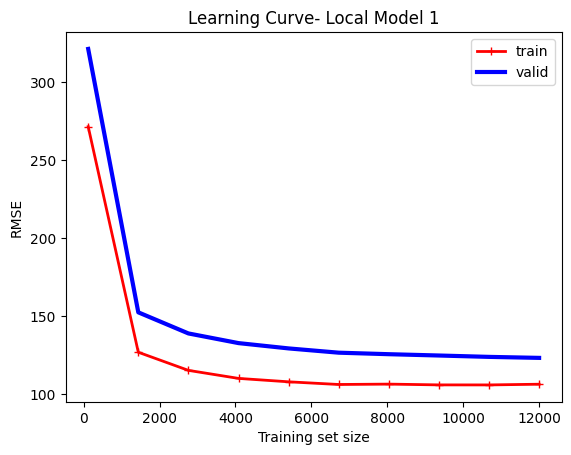

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(best_rf_model, sampled_X_train , sampled_y_train , train_sizes=np.linspace(0.01, 1, 10), cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
  # beautify the figure: add labels, axis, grid, and legend
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning Curve- Local Model 1')
plt.legend()
plt.show()

# Model selection

## Random Forest

In [ ]:
X_test_sca=scaler.transform(X_test)
X_test_prepro=imputer.transform(X_test_sca)

In [ ]:
# Now you can use .predict()
pred_rf_2=best_rf_model.predict(X_test_prepro)

# Calculate Mean Squared Error (MSE)
mse_rf_2= mean_squared_error(y_test, pred_rf_2)

# Calculate Root Mean Squared Error (RMSE)
rmse_rf_2= np.sqrt(mse_rf_2)

# Calculate Mean Absolute Error (MAE)
mae_rf_2= mean_absolute_error(y_test, pred_rf_2)

# Calculate R-squared
r2_rf_2= r2_score(y_test, pred_rf_2)

print(f'MSE Random Forest:{np.round(mse_rf_2,3)}')
print(f'RMSE Random Forest:{np.round(rmse_rf_2,3)}')
print(f'MAE Random Forest: {np.round(mae_rf_2,3)}')
print(f'R-squared Random Forest: {np.round(r2_rf_2,3)}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


MSE Random Forest:15006.499
RMSE Random Forest:122.501
MAE Random Forest: 81.277
R-squared Random Forest: 0.98


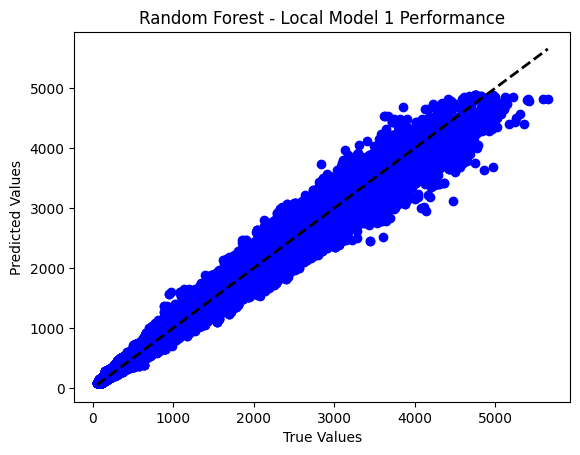

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted values vs actual values
plt.scatter(y_test, pred_rf_2, color="blue")

# Calculate the min and max values for both y_test and pred_rf_2 to ensure the line covers the full range
combined_min = min(y_test.min(), pred_rf_2.min())
combined_max = max(y_test.max(), pred_rf_2.max())

# Plot a diagonal line
plt.plot([combined_min, combined_max], [combined_min, combined_max], 'k--', lw=2)

plt.title("Random Forest - Local Model 1 Performance")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.show()


# Testing

## Data

In [ ]:
import py7zr
import pandas as pd
import os

# Define the path to the .7z file and the extraction target path
archive_path = '/content/drive/My Drive/Colab Notebooks/Project/mds-data-1-soil.7z'
extraction_path = '/content/drive/My Drive/Colab Notebooks/Project/'

# Extract the .feather file from the .7z archive
with py7zr.SevenZipFile(archive_path, mode='r') as z:
    z.extractall(path=extraction_path)

# Now, the .feather file should be extracted to the extraction_path.
# Define the path to the extracted .feather file
feather_file_path = os.path.join(extraction_path, 'mds-data-1-soil.feather')

# Load the .feather file into a pandas DataFrame
df2 = pd.read_feather(feather_file_path)

# Now 'df' contains the data from the 'mds-data-1-soil.feather' file


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478438 entries, 0 to 478437
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 478438 non-null  object  
 1   longitude            478438 non-null  float64 
 2   latitude             478438 non-null  float64 
 3   simDoc               478438 non-null  object  
 4   soilCapacity         478438 non-null  category
 5   initialSW            478438 non-null  category
 6   NFert                478438 non-null  category
 7   sowDate              478438 non-null  category
 8   cultivar             478438 non-null  category
 9   pldensity            478438 non-null  category
 10  SSC_start            478438 non-null  float64 
 11  SSC_slowstart        478438 non-null  float64 
 12  year                 478438 non-null  int32   
 13  yield                473680 non-null  float64 
 14  pawc                 473680 non-null  float64 
 15  

In [ ]:
df2=pd.DataFrame(df2)
df2.dropna(inplace=True)
X_test = df2[['EpBeforeFlowering','EpAroundFlowering', 'EpAfterFlowering', 'CGRAroundFlowering']]
y_test = df2['yield']

In [ ]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=['EpBeforeFlowering','EpAroundFlowering', 'EpAfterFlowering', 'CGRAroundFlowering'])

## RF

In [ ]:
test_rf=best_rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_test= mean_squared_error(y_test, test_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse_test= np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae_test= mean_absolute_error(y_test, test_rf)

# Calculate R-squared
r2_test= r2_score(y_test, test_rf)

print(f'MSE Test:{np.round(np.mean(mse_test),2)}')
print(f'RMSE Test:{np.round(np.mean(rmse_test),2)}')
print(f'MAE Test: {np.round(np.mean(mae_test),2)}')
print(f'R-squared Test: {np.round(r2_test,2)}')

MSE Test:187323.02
RMSE Test:432.81
MAE Test: 342.36
R-squared Test: 0.85


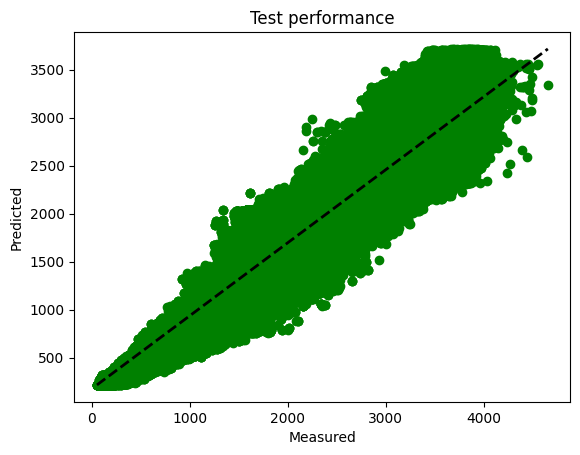

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted values vs actual values
plt.scatter(y_test, test_rf, color="green")
plt.plot([y_test.min(), y_test.max()], [test_rf.min(), test_rf.max()], 'k--', lw=2)  # Diagonal line
plt.title("Test performance")
plt.xlabel('Measured')
plt.ylabel('Predicted')

plt.show()